In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import pandas as pd

In [2]:
nifty_symbol = "^NSEI"
banknifty_symbol = "^NSEBANK"

start_date = "2021-01-01"
end_date = "2023-09-07"
nifty_data = yf.download(nifty_symbol, start=start_date, end=end_date)

df = pd.DataFrame(nifty_data)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.drop(df[df['Volume'] == 0].index, inplace=True)

In [4]:
def Find_Up(df):
    data = df[0]<df[1]
    if data==True:
        return "Green"
    else:
        return "Red"

In [5]:
df['Canndel']= df[['Open','Close']].apply(Find_Up,axis=1)

In [6]:
df['Pivot'] = (df['High'] + df['Low'] + df['Close']) / 3
df['R1'] = 2 * df['Pivot'] - df['Low']
df['S1'] = 2 * df['Pivot'] - df['High']
df['R2'] = df['Pivot'] + df['High'] - df['Low']
df['S2'] = df['Pivot'] - df['High'] + df['Low']
df['R3'] = df['High'] + 2 * (df['Pivot'] - df['Low'])
df['S3'] = df['Low'] - 2 * (df['High'] - df['Pivot'])     

In [7]:
from ta import momentum,trend
df['RSI'] = momentum.RSIIndicator(df['Close'], window=14).rsi()

In [8]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA40'] = df['Close'].rolling(window=40).mean()
df['Trend'] = 'Sideways'
df.loc[df['Close'] > df['SMA20'], 'Trend'] = 'Uptrend'
df.loc[df['Close'] < df['SMA20'], 'Trend'] = 'Downtrend'
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,Canndel,Pivot,R1,S1,R2,S2,R3,S3,RSI,SMA20,SMA40,Trend
Date,,,,,,,,,,,,,,,,,,
2023-08-08,19627.199219,19634.400391,19533.099609,19570.849609,19570.849609,260300,Red,19579.449870,19625.800130,19524.499349,19680.750651,19478.149089,19727.100911,19423.198568,53.790115,19644.922754,19328.863916,Downtrend
2023-08-09,19578.800781,19645.500000,19467.500000,19632.550781,19632.550781,266500,Green,19581.850260,19696.200521,19518.200521,19759.850260,19403.850260,19874.200521,19340.200521,56.015239,19657.335254,19351.773926,Downtrend
2023-08-10,19605.550781,19623.599609,19495.400391,19543.099609,19543.099609,312200,Red,19554.033203,19612.666016,19484.466797,19682.232422,19425.833984,19740.865234,19356.267578,52.098523,19663.802734,19371.453906,Downtrend
2023-08-11,19554.250000,19557.750000,19412.750000,19428.300781,19428.300781,235500,Red,19466.266927,19519.783854,19374.783854,19611.266927,19321.266927,19664.783854,19229.783854,47.507454,19656.992773,19389.958936,Downtrend
2023-08-14,19383.949219,19465.849609,19257.900391,19434.550781,19434.550781,243900,Green,19386.100260,19514.300130,19306.350911,19594.049479,19178.151042,19722.249349,19098.401693,47.777275,19643.147852,19405.172705,Downtrend
2023-08-17,19450.550781,19461.550781,19326.250000,19365.250000,19365.250000,268700,Red,19384.350260,19442.450521,19307.149740,19519.651042,19249.049479,19577.751302,19171.848958,45.014337,19623.947852,19420.417725,Downtrend
2023-08-18,19301.750000,19373.800781,19253.599609,19310.150391,19310.150391,256100,Green,19312.516927,19371.434245,19251.233073,19432.718099,19192.315755,19491.635417,19131.031901,42.890571,19597.797852,19432.754004,Downtrend
2023-08-21,19320.650391,19425.949219,19296.300781,19393.599609,19393.599609,262600,Green,19371.949870,19447.598958,19317.950521,19501.598307,19242.301432,19577.247396,19188.302083,46.971191,19568.520313,19446.172754,Downtrend
2023-08-22,19417.099609,19443.500000,19381.300781,19396.449219,19396.449219,208700,Red,19407.083333,19432.865885,19370.666667,19469.282552,19344.884115,19495.065104,19308.467448,47.110166,19551.092773,19461.802734,Downtrend


<Axes: xlabel='Date', ylabel='SMA20'>

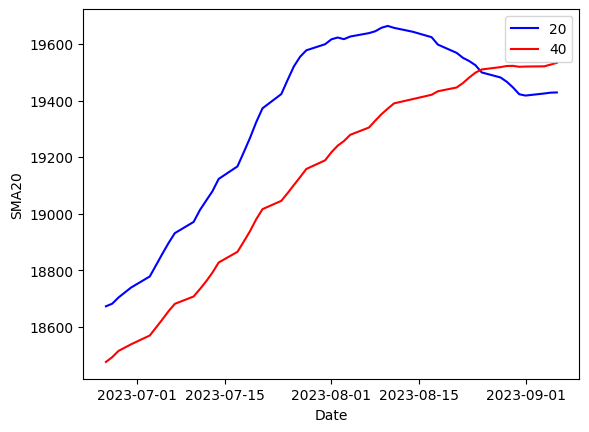

In [9]:
dff = df.tail(50)
sns.lineplot(data=dff,x ="Date",y="SMA20",color="b", label="20")
sns.lineplot(data=dff,x ="Date",y="SMA40",color="r", label="40")

In [10]:
df['MACD_Blue'] = trend.MACD(df['Close']).macd()
df['MACD_Red'] = trend.MACD(df['Close']).macd_signal()
df['MACD_Value'] = df['MACD_Blue'] - df['MACD_Red']

In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Canndel,Pivot,R1,S1,...,S2,R3,S3,RSI,SMA20,SMA40,Trend,MACD_Blue,MACD_Red,MACD_Value
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-31,19375.550781,19388.199219,19223.650391,19253.800781,19253.800781,562600,Red,19288.550130,19353.449870,19188.901042,...,19124.001302,19517.998698,19024.352214,41.652880,19422.187695,19519.293994,Downtrend,-40.304174,-11.787822,-28.516352
2023-09-01,19258.150391,19458.550781,19255.699219,19435.300781,19435.300781,333000,Green,19383.183594,19510.667969,19307.816406,...,19180.332031,19713.519531,19104.964844,51.446320,19417.625195,19520.214014,Uptrend,-31.722691,-15.774796,-15.947895
2023-09-04,19525.050781,19545.150391,19432.849609,19528.800781,19528.800781,296800,Green,19502.266927,19571.684245,19459.383464,...,19389.966146,19683.985026,19347.082682,55.582414,19424.982715,19521.001514,Uptrend,-17.179106,-16.055658,-1.123448
2023-09-05,19564.650391,19587.050781,19525.750000,19574.900391,19574.900391,256800,Green,19562.567057,19599.384115,19538.083333,...,19501.266276,19660.684896,19476.782552,57.504537,19427.877734,19527.079004,Uptrend,-1.911324,-13.226791,11.315467
2023-09-06,19581.199219,19636.449219,19491.500000,19611.050781,19611.050781,287600,Green,19579.666667,19667.833333,19522.884115,...,19434.717448,19812.782552,19377.934896,59.002776,19428.565234,19533.457764,Uptrend,12.956187,-7.990196,20.946382


In [12]:
# Calculate True Range (TR)
df['tr1'] = df['High'] - df['Low']
df['tr2'] = abs(df['High'] - df['Close'].shift())
df['tr3'] = abs(df['Low'] - df['Close'].shift())
df['tr'] = df[['tr1', 'tr2', 'tr3']].max(axis=1)

# Calculate the Positive Directional Indicator (+DI) and Negative Directional Indicator (-DI)
df['dmp'] = df['High'].diff()
df['dmn'] = -df['Low'].diff()
df['dmp'] = df['dmp'].apply(lambda x: x if x > 0 else 0)
df['dmn'] = df['dmn'].apply(lambda x: x if x > 0 else 0)

# Calculate the Smoothed True Range (ATR)
atr_window = 14
df['atr'] = df['tr'].rolling(window=atr_window).mean()

# Calculate +DI and -DI
di_window = 14
df['+di'] = (df['dmp'].rolling(window=di_window).sum() / df['atr']) * 100
df['-di'] = (df['dmn'].rolling(window=di_window).sum() / df['atr']) * 100

# Calculate the Directional Movement Index (DX)
df['dx'] = (abs(df['+di'] - df['-di']) / (df['+di'] + df['-di'])) * 100

# Calculate the ADX
adx_window = 14
df['adx'] = df['dx'].rolling(window=adx_window).mean()

In [13]:
columns_to_drop = ['tr1', 'tr2', 'tr3', 'dmp', 'dmn', 'tr','atr','+di','-di','dx']
df = df.drop(columns=columns_to_drop, axis=1)

In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Canndel,Pivot,R1,S1,...,R3,S3,RSI,SMA20,SMA40,Trend,MACD_Blue,MACD_Red,MACD_Value,adx
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-31,19375.550781,19388.199219,19223.650391,19253.800781,19253.800781,562600,Red,19288.550130,19353.449870,19188.901042,...,19517.998698,19024.352214,41.652880,19422.187695,19519.293994,Downtrend,-40.304174,-11.787822,-28.516352,39.296528
2023-09-01,19258.150391,19458.550781,19255.699219,19435.300781,19435.300781,333000,Green,19383.183594,19510.667969,19307.816406,...,19713.519531,19104.964844,51.446320,19417.625195,19520.214014,Uptrend,-31.722691,-15.774796,-15.947895,38.159476
2023-09-04,19525.050781,19545.150391,19432.849609,19528.800781,19528.800781,296800,Green,19502.266927,19571.684245,19459.383464,...,19683.985026,19347.082682,55.582414,19424.982715,19521.001514,Uptrend,-17.179106,-16.055658,-1.123448,35.600874
2023-09-05,19564.650391,19587.050781,19525.750000,19574.900391,19574.900391,256800,Green,19562.567057,19599.384115,19538.083333,...,19660.684896,19476.782552,57.504537,19427.877734,19527.079004,Uptrend,-1.911324,-13.226791,11.315467,34.073681
2023-09-06,19581.199219,19636.449219,19491.500000,19611.050781,19611.050781,287600,Green,19579.666667,19667.833333,19522.884115,...,19812.782552,19377.934896,59.002776,19428.565234,19533.457764,Uptrend,12.956187,-7.990196,20.946382,31.643543
